# Análisis de precios del producto MIBGAS

En este notebook se analizan los precios del mercado mayorista del gas en España, conocido como el Mercado Ibérico del Gas (MIBGAS).


## Obtención de los datos

Los datos han sido obtenidos de la página oficial de la Comisión Nacional de los Mercados y la Competencia (CNMC) en la ruta: 

[Inicio → Energía → Mercado mayorista del gas natural → Conjuntos de datos → Evolución de los precios por productos MIBGAS → Evolución de los precios por productos MIBGAS](https://data.cnmc.es/energia/mercado-mayorista-del-gas-natural/conjuntos-de-datos/evolucion-de-los-precios-por-productos) 

In [19]:
import pandas as pd 

df_gas = pd.read_csv('../datos/precios_gas_CNMC.csv', sep=';', decimal=',', parse_dates=['Fecha de negociación'])
df_gas

,Fecha de negociación,Producto de MIBGAS,Precios de los productos MIBGAS (€/MWh)
0,2015-12-16,Producto diario D+1,19.67
1,2015-12-18,Producto diario D+1,19.40
2,2015-12-21,Producto intradiario WD,18.55
3,2015-12-29,Producto diario D+1,19.25
4,2016-01-05,Producto intradiario WD,19.00
...,...,...,...
11136,2024-12-31,Producto mensual M+1,48.43
11137,2024-12-31,Producto mensual M+2,49.35
11138,2024-12-31,Producto mensual M+3,49.20
11139,2024-12-31,Producto trimestral Q+2,48.73


In [3]:
df_gas.dtypes

Fecha de negociación                       datetime64[ns]
Producto de MIBGAS                                 object
Precios de los productos MIBGAS (€/MWh)           float64
dtype: object

In [4]:
df_gas['Producto de MIBGAS'].unique()

array(['Producto diario D+1', 'Producto intradiario WD',
       'Producto mensual M+1', 'Producto mensual M+2',
       'Producto anual Y+1', 'Producto trimestral Q+1',
       'Producto trimestral Q+2', 'Producto trimestral Q+3',
       'Producto mensual  M+3'], dtype=object)

## Filtrado

De todos los datos de precios solo interesan los del día siguiente. Los precios mensuales, trimestrales, etcétera no se utilizarán.

In [20]:
df_gas_day_ahead = df_gas[df_gas['Producto de MIBGAS'] == 'Producto diario D+1']
df_gas_day_ahead.set_index('Fecha de negociación', inplace=True)
df_gas_day_ahead.sort_index(inplace=True)

df_gas_day_ahead

,Producto de MIBGAS,Precios de los productos MIBGAS (€/MWh)
Fecha de negociación,,
2015-12-16,Producto diario D+1,19.67
2015-12-18,Producto diario D+1,19.40
2015-12-29,Producto diario D+1,19.25
2016-01-05,Producto diario D+1,19.00
2016-01-07,Producto diario D+1,18.75
...,...,...
2024-12-27,Producto diario D+1,48.21
2024-12-28,Producto diario D+1,49.86
2024-12-29,Producto diario D+1,51.93


In [21]:
del df_gas_day_ahead['Producto de MIBGAS']
df_gas_day_ahead

,Precios de los productos MIBGAS (€/MWh)
Fecha de negociación,
2015-12-16,19.67
2015-12-18,19.40
2015-12-29,19.25
2016-01-05,19.00
2016-01-07,18.75
...,...
2024-12-27,48.21
2024-12-28,49.86
2024-12-29,51.93


Además, los análisis utilizarán datos a partir del año 2020


In [4]:
df_gas_day_ahead = df_gas_day_ahead[df_gas_day_ahead.index >= '2020-01-01']
df_gas_day_ahead

,Precios de los productos MIBGAS (€/MWh)
Fecha de negociación,
2020-01-01,11.89
2020-01-02,11.69
2020-01-03,11.11
2020-01-04,12.52
2020-01-05,12.93
...,...
2024-12-27,48.21
2024-12-28,49.86
2024-12-29,51.93


## Visualizaciones

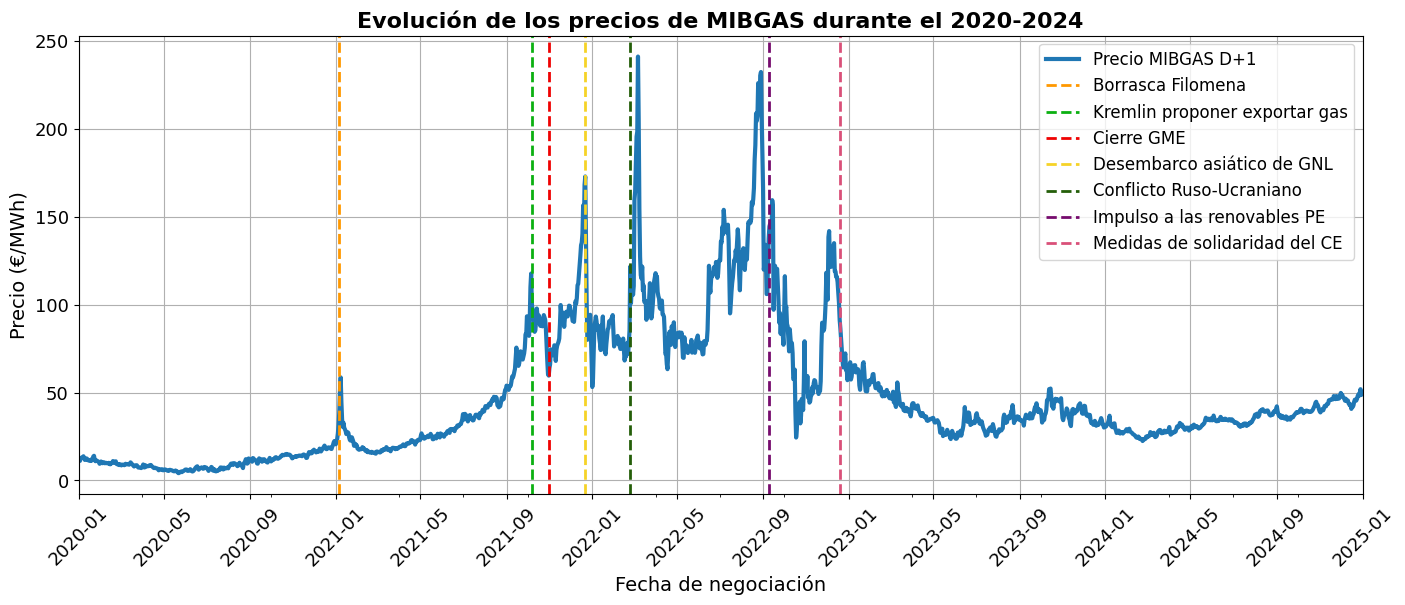

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df_gas_day_ahead['Precios de los productos MIBGAS (€/MWh)'].plot(linewidth=3, label='Precio MIBGAS D+1')

# Definir colores personalizados para los eventos
# Definir colores y estilos para los eventos relevantes
colores = {
    'Borrasca Filomena': '#FF9800',  
    'Kremlin exporta gas': "#0BB011",  
    'Cierre GME': "#EF0202",  
    'Desembarco GNL': "#F6D327",  
    'Conflicto Ruso-Ucraniano': "#245E09",  
    'Impulso renovables PE': "#760B6D",  
    'Solidaridad CE': "#D95079"
}
lns = '--'
lnw = 2

# Añadir líneas verticales para eventos relevantes
plt.axvline(pd.Timestamp('2021-01-06'), color=colores['Borrasca Filomena'], linestyle=lns, linewidth=lnw, label='Borrasca Filomena')
plt.axvline(pd.Timestamp('2021-10-07'), color=colores['Kremlin exporta gas'], linestyle=lns, linewidth=lnw, label='Kremlin proponer exportar gas')
plt.axvline(pd.Timestamp('2021-11-01'), color=colores['Cierre GME'], linestyle=lns, linewidth=lnw, label='Cierre GME')
plt.axvline(pd.Timestamp('2021-12-22'), color=colores['Desembarco GNL'], linestyle=lns, linewidth=lnw, label='Desembarco asiático de GNL')
plt.axvline(pd.Timestamp('2022-02-24'), color=colores['Conflicto Ruso-Ucraniano'], linestyle=lns, linewidth=lnw, label='Conflicto Ruso-Ucraniano')
plt.axvline(pd.Timestamp('2022-09-09'), color=colores['Impulso renovables PE'], linestyle=lns, linewidth=lnw, label='Impulso a las renovables PE')
plt.axvline(pd.Timestamp('2022-12-19'), color=colores['Solidaridad CE'], linestyle=lns, linewidth=lnw, label='Medidas de solidaridad del CE')

#plt.axvline(pd.Timestamp('2022-06-15'), color='purple', linestyle='--', linewidth=1, label='Inicio del tope al gas')
#plt.axvline(pd.Timestamp('2023-12-31'), color='green', linestyle='--', linewidth=1, label='Fin del tope al gas')

plt.grid(True)
plt.title('Evolución de los precios de MIBGAS durante el 2020-2024', fontsize=16, fontweight='bold')
plt.xlabel('Fecha de negociación', fontsize=14)
plt.ylabel('Precio (€/MWh)', fontsize=14)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5, 9)))  # enero, mayo, septiembre
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Añadir el 1 de enero de 2025 al eje X
plt.gca().set_xlim(df_gas_day_ahead.index.min(), pd.Timestamp('2025-01-01'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(fontsize=12, frameon=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

### Exportación a CSV

In [ ]:
df_gas_day_ahead.reset_index(inplace=True)

df_gas_day_ahead.rename(columns={'Fecha de negociación': 'fecha', 'Precios de los productos MIBGAS (€/MWh)': 'precio_GAS'}, inplace=True)

df_gas_day_ahead.to_csv('../datos/precios_gas.csv', sep=',', decimal='.', index=False)